<a href="https://colab.research.google.com/github/RodolphoSartori/SM/blob/main/Dados_de_C%C3%A2mbio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install python-bcb

In [2]:
from bcb import currency
import pandas as pd
import plotnine as p9
import numpy as np

Coletando dados de Câmbio

In [5]:
pares = currency.get(
    symbols = ["USD", "EUR", "CNY"],
    start = "2020-01-01",
    end = pd.to_datetime("today").date(),
    side = "ask"
)
pares

,CNY,EUR,USD
Date,,,
2020-01-02,0.5774,4.5051,4.0213
2020-01-03,0.5818,4.5247,4.0522
2020-01-06,0.5814,4.5384,4.0554
2020-01-07,0.5881,4.5513,4.0841
2020-01-08,0.5857,4.5235,4.0672
...,...,...,...
2024-12-11,0.8308,6.3282,6.0320
2024-12-12,0.8173,6.2224,5.9408
2024-12-13,0.8302,6.3360,6.0400


from matplotlib import pyplot as plt
pares['CNY'].plot(kind='hist', bins=20, title='CNY')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pares['EUR'].plot(kind='hist', bins=20, title='EUR')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pares['USD'].plot(kind='hist', bins=20, title='USD')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pares.plot(kind='scatter', x='CNY', y='EUR', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pares.plot(kind='scatter', x='EUR', y='USD', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pares['CNY'].plot(kind='line', figsize=(8, 4), title='CNY')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
pares['EUR'].plot(kind='line', figsize=(8, 4), title='EUR')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
pares['USD'].plot(kind='line', figsize=(8, 4), title='USD')
plt.gca().spines[['top', 'right']].set_visible(False)

Análise dos Pares

In [25]:
analise_pares = (
    pares
    .reset_index()
    .melt(id_vars = "Date", var_name = "Moeda", value_name = "Cotação")
    .sort_values(["Moeda", "Date"])
    .set_index(["Date", "Moeda"])
)
analise_pares = analise_pares.join(
    analise_pares.groupby(level = "Moeda")["Cotação"].rolling(window = 30).mean().rename("Média Móvel").droplevel(2)

).reset_index().melt(id_vars = ["Date", "Moeda"], var_name = "Variável", value_name = "Valor")
analise_pares


,Date,Moeda,Variável,Valor
0,2020-01-02,CNY,Cotação,0.577400
1,2020-01-03,CNY,Cotação,0.581800
2,2020-01-06,CNY,Cotação,0.581400
3,2020-01-07,CNY,Cotação,0.588100
4,2020-01-08,CNY,Cotação,0.585700
...,...,...,...,...
7471,2024-12-11,USD,Média Móvel,5.865147
7472,2024-12-12,USD,Média Móvel,5.872707
7473,2024-12-13,USD,Média Móvel,5.881370
7474,2024-12-16,USD,Média Móvel,5.890470


/usr/local/lib/python3.10/dist-packages/mizani/breaks.py:448: FutureWarning: Passing the width as the parameter has been deprecated and will not work in a future version. Use breaks_date(width="4 years")


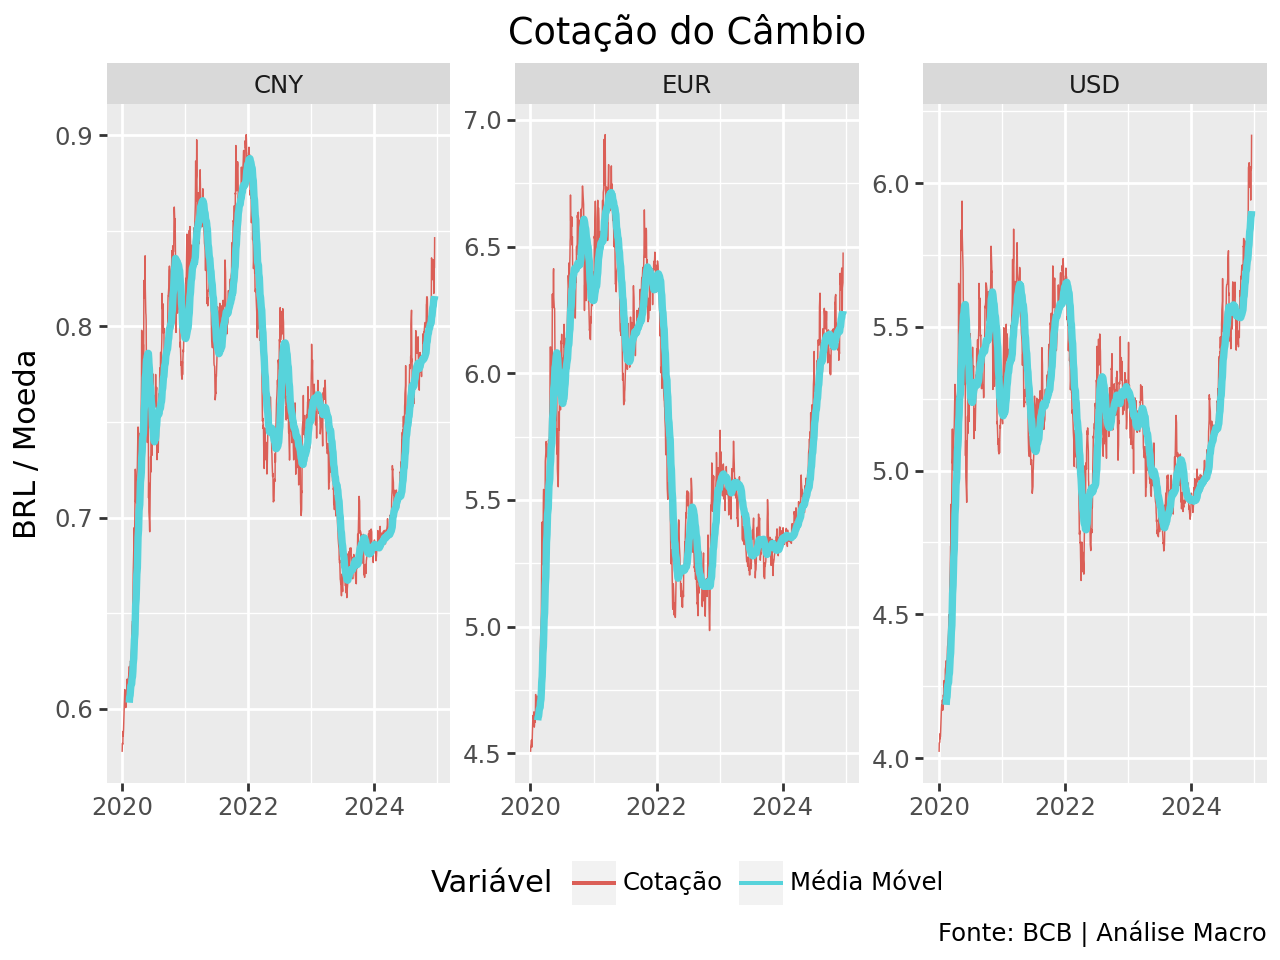

In [26]:
(
p9.ggplot(analise_pares.reset_index()) +
  p9.aes(x = "Date", y = "Valor", color = "Variável", size = "Variável") +
  p9.geom_line() +
  p9.facet_wrap(facets = "Moeda", scales = "free") +
  p9.scale_x_date(date_breaks = "2 years", date_labels = "%Y") +
  p9.scale_size_manual(values = {"Cotação": 0.3, "Média Móvel": 1.5}) +
  p9.guides(size = "none") +
  p9.labs(
      title = "Cotação do Câmbio",
      y = "BRL / Moeda",
      x = "",
      caption = "Fonte: BCB | Análise Macro"
  ) +
  p9.theme(legend_position = "bottom")
  )